In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# !cp text2.jpg "/content/drive/MyDrive/IP_2025/TieuLuan2/"

Saving text2.jpg to text2 (1).jpg


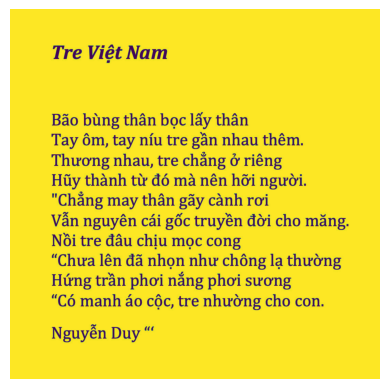

In [4]:
# coin='drive/MyDrive/IP_2025/TieuLuan2/text2.jpg'
coin = 'text2.jpg'
img=plt.imread(coin,cv2.IMREAD_GRAYSCALE)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
def convolve(img,filter_type):
  h,w=img.shape
  th,tw=filter_type.shape
  pad_h,pad_w=th//2,tw//2

  padded=np.pad(img,((pad_h,pad_h),(pad_w,pad_w)),'constant')
  output=np.zeros((h,w)).astype(np.float16)

  for i in range(h):
    for j in range(w):
      region = padded[i:i+th, j:j+tw]
      output[i,j] =  np.sum(region*filter_type)
  return output

In [ ]:
def prewitt(img):
  prewitt_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
  prewitt_y = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
  Gx_p = convolve(img, prewitt_x)
  Gy_p = convolve(img, prewitt_y)
  prewitt = np.sqrt(Gx_p**2 + Gy_p**2)
  return prewitt.astype(np.uint8)

In [ ]:
def sobel(img):
  sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
  sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
  Gx_s = convolve(img, sobel_x)
  Gy_s = convolve(img, sobel_y)
  sobel = np.sqrt(Gx_s**2 + Gy_s**2)
  return sobel.astype(np.uint8)

In [48]:
def normalize(img):
    img = img - img.min()
    img = img / img.max() * 255
    return img.astype(np.uint8)


In [49]:
def Laplacian(img):
    # Làm mịn ảnh trước để giảm nhiễu
    smoothed = cv2.GaussianBlur(img, (3, 3), 0) if len(img.shape) == 2 else img

    # Kernel Laplacian chuẩn
    laplacian_arr = np.array([[0, 1, 0],
                              [1, -4, 1],
                              [0, 1, 0]])

    edges = convolve(smoothed, laplacian_arr)

    # Lấy absolute value và chuẩn hóa
    edges = np.abs(edges)
    edges = (edges / edges.max() * 255).astype(np.uint8)

    # Threshold adaptive
    threshold = np.percentile(edges, 85)  # Giữ lại 15% edges mạnh nhất
    binary_edges = np.where(edges > threshold, 255, 0)

    return binary_edges.astype(np.uint8)

In [ ]:
edges_canny = cv2.Canny(img, 80, 150)

/tmp/ipython-input-2327819424.py:6: RuntimeWarning: overflow encountered in square
  prewitt = np.sqrt(Gx_p**2 + Gy_p**2)
/tmp/ipython-input-2327819424.py:6: RuntimeWarning: overflow encountered in add
  prewitt = np.sqrt(Gx_p**2 + Gy_p**2)
/tmp/ipython-input-2327819424.py:7: RuntimeWarning: invalid value encountered in cast
  return prewitt.astype(np.uint8)


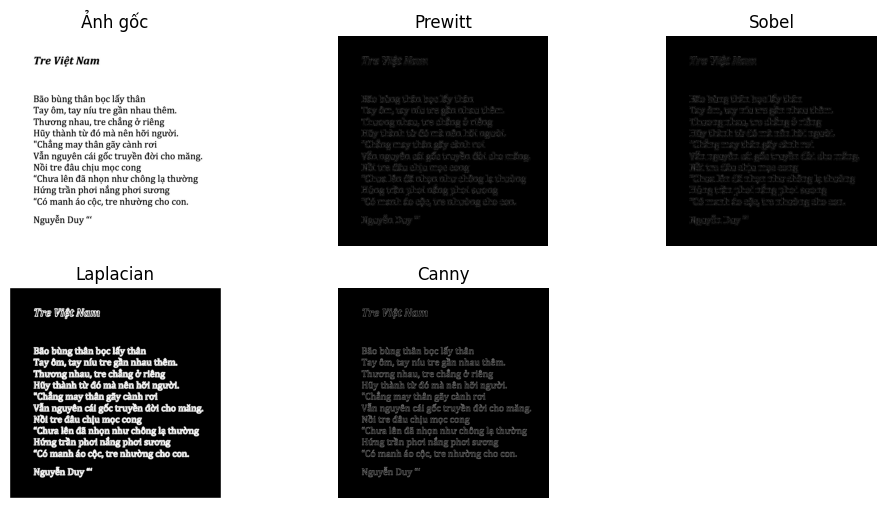

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(2,3,1); plt.imshow(img, cmap='gray'); plt.title("Ảnh gốc"); plt.axis("off")
plt.subplot(2,3,2); plt.imshow(prewitt(img), cmap='gray'); plt.title("Prewitt"); plt.axis("off")
plt.subplot(2,3,3); plt.imshow(sobel(img), cmap='gray'); plt.title("Sobel"); plt.axis("off")
plt.subplot(2,3,4); plt.imshow(Laplacian(img), cmap='gray'); plt.title("Laplacian"); plt.axis("off")
plt.subplot(2,3,5); plt.imshow(edges_canny, cmap='gray'); plt.title("Canny"); plt.axis("off")

plt.show()


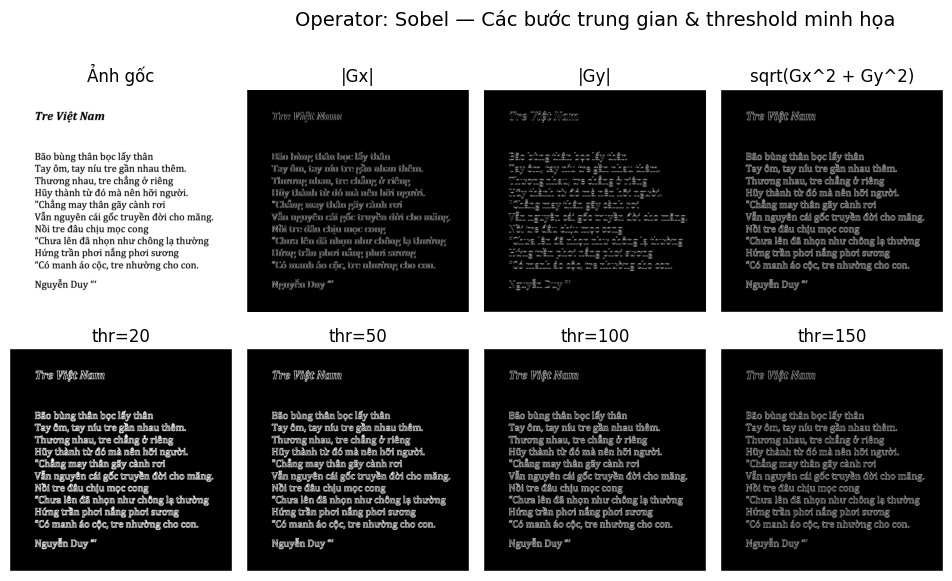

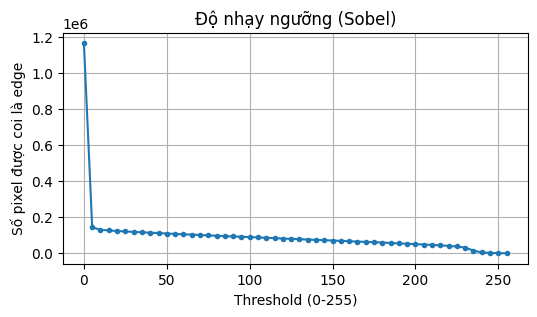

In [ ]:
prewitt_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_y = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

operator = 'Sobel'
if operator.lower().startswith('s'):
    Kx, Ky = sobel_x, sobel_y
else:
    Kx, Ky = prewitt_x, prewitt_y

Gx = convolve(img, Kx)
Gy = convolve(img, Ky)
magnitude = np.hypot(Gx, Gy)   # sqrt(Gx^2 + Gy^2)

# normalize for display
Gx_disp = normalize(np.abs(Gx))
Gy_disp = normalize(np.abs(Gy))
mag_disp = normalize(magnitude)

sample_thresholds = [20, 50, 100, 150]   # giá trị 0-255 trên ảnh chuẩn hóa
binaries = [(mag_disp >= t).astype(np.uint8)*255 for t in sample_thresholds]

# -------- sensitivity: threshold vs number of edge pixels ----------
thr_vals = np.arange(0, 256, 5)
counts = [(mag_disp >= t).sum() for t in thr_vals]

# -------- plot results ----------
plt.figure(figsize=(12,6))
plt.suptitle(f"Operator: {operator} — Các bước trung gian & threshold minh họa", fontsize=14)

plt.subplot(2,5,1); plt.imshow(img, cmap='gray'); plt.title("Ảnh gốc"); plt.axis('off')
plt.subplot(2,5,2); plt.imshow(Gx_disp, cmap='gray'); plt.title("|Gx|"); plt.axis('off')
plt.subplot(2,5,3); plt.imshow(Gy_disp, cmap='gray'); plt.title("|Gy|"); plt.axis('off')
plt.subplot(2,5,4); plt.imshow(mag_disp, cmap='gray'); plt.title("sqrt(Gx^2 + Gy^2)"); plt.axis('off')

# show some thresholded images
for i, t in enumerate(sample_thresholds):
    plt.subplot(2,5,6+i)
    plt.imshow(binaries[i], cmap='gray')
    plt.title(f"thr={t}")
    plt.axis('off')

plt.tight_layout(rect=[0,0,1,0.95])

# plot threshold sensitivity separately
plt.figure(figsize=(6,3))
plt.plot(thr_vals, counts, '-o', markersize=3)
plt.xlabel('Threshold (0-255)')
plt.ylabel('Số pixel được coi là edge')
plt.title(f'Độ nhạy ngưỡng ({operator})')
plt.grid(True)
plt.show()